In [315]:
from ROOT import *

file = TFile.Open("tan10.root", "READ")
tree = []
for i in range(20):
    a = file.Get("Position"+str(i+1))
    tree.append(a)

hist = []
for i in range(20):
    h = TH1F("number of photons per run "+str(i+1), "", 1000, 0, 1000)
    hist.append(h)
FZX = []
FY = []

In [316]:
for i in range(len(tree)):
    AZX = []
    AY = []
    for entry in tree[i]:
        hist[i].Fill(entry.N)
        AZX.append(entry.fZX)
        AY.append(entry.fY)
    FZX.append(AZX)
    FY.append(AY)

In [317]:
FZXY = []
for i in range(20):
    S = 0 
    fzxy = []
    for j in range(1000):
        C = []
        for k in range(S, S + int(hist[i].GetBinContent(j+1))):
            S = S + 1
            C.append((FZX[i][k], FY[i][k]))
        fzxy.append(C)
    FZXY.append(fzxy)

In [318]:
FZXY_NEW = []
for i in range(20):
    FZXY_new = []
    for j in range(1000):
        FZXY_new.append(list(set(FZXY[i][j])))
    FZXY_NEW.append(FZXY_new)

In [319]:
FZX = []
FY = []
FZXY = []

In [320]:
Z2D = []
X2D = []

In [321]:
for i in range(20):
    if i%2 == 0:
        S = 0
        for j in range(1000):
            Z = 0.
            for k in range(len(FZXY_NEW[i][j])):
                Z = Z + (4*(floor(FZXY_NEW[i][j][k][0]/0.023)+1)-2)*0.00575*10000
                S = S + 1
            Z2D.append(Z/len(FZXY_NEW[i][j]))
    else:
        for m in range(1000):
            X = 0.
            G = 0
            for n in range(len(FZXY_NEW[i][m])):
                X = X + (4*(floor(FZXY_NEW[i][m][n][0]/0.023)+1)-2)*0.00575*10000
                G = G + 1                    
            X2D.append(X/len(FZXY_NEW[i][m]))

In [322]:
Y = []
delZ = 5
for i in range(10):
    Y.append(-39.4375+(i)*delZ)

In [323]:
layers = []
for i in range(1000):
    l = []
    for j in range(10):
        l.append(list([Z2D[j*1000+i], Y[j]]))
    layers.append(l)

In [324]:
Z_mean = []
for i in range(1000):
    zmean = 0
    for j in range(10):
        zmean = zmean + layers[i][j][0]
    Z_mean.append(zmean/10)

In [325]:
ymean = 0
for i in range(10):
    ymean = ymean + Y[i]
ymean = ymean/10

In [326]:
import math

In [327]:
angles = []
k = []
for i in range(1000):
    denom = 0
    numer = 0
    for j in range(10):
        numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - ymean)
        denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
    angles.append((180/math.pi)*math.atan(numer/denom))
    k.append(numer/denom)

In [328]:
b = []
for i in range(1000):
    Y = 0 
    X = 0
    for j in range(10):
        Y = Y + layers[i][j][1]
        X = X + layers[i][j][0]
    b.append((Y-k[i]*X/1000)/10)

chi = []
for i in range(1000):
    c = 0
    for j in range(10):
        c = c + (layers[i][j][1] - k[i]*layers[i][j][0]/1000 - b[i])**2
    chi.append(c)

AA1 = []
I1 = []
for i in range(1000):
    if chi[i] > 0.1:
        A = []
        for j in range(10):
            c = (layers[i][j][1] - k[i]*layers[i][j][0]/1000 -b[i])**2
            A.append(c)
        AA1.append([i,A])
        I1.append(i)

In [329]:
Y = []
delZ = 5
for i in range(10):
    Y.append(-39.4375+(i)*delZ)

In [330]:
Z_mean = []
for i in range(1000):
    zmean = 0
    if i not in I1:
        for j in range(10):
            zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/10)
    else:
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/9)

Y_mean = []
for i in range(1000):
    ymean = 0
    if i not in I1:
        for j in range(10):
            ymean = ymean + Y[j]
        Y_mean.append(ymean/10)
    else:
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                ymean = ymean + Y[j]
        Y_mean.append(ymean/9)

In [331]:
angles2 = []
k1 = []
s = 0
for i in range(1000):
    if i not in I1:
        denom = 0
        numer = 0
        for j in range(10):
            numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
            denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles2.append((180/math.pi)*math.atan(numer/denom))
    else:
        denom = 0
        numer = 0
        for j in range(10):
            if j != AA1[s][1].index(max(AA1[s][1])):
                numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
                denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles2.append((180/math.pi)*math.atan(numer/denom))
        k1.append(numer/denom)
        s = s + 1

In [332]:
b1 = []
ss = 0
for i in range(len(I1)):
    Y = 0 
    X = 0
    for j in range(10):
        if j != AA1[ss][1].index(max(AA1[ss][1])):
            Y = Y + layers[I1[i]][j][1]
            X = X + layers[I1[i]][j][0] #NOT i 
    b1.append((Y-k1[i]*X/1000)/9)
    ss = ss + 1

chi1 = []
sss = 0
for i in range(len(I1)):
    c = 0
    for j in range(10):
        if j != AA1[sss][1].index(max(AA1[sss][1])):
            c = c + (layers[I1[i]][j][1] - k1[i]*layers[I1[i]][j][0]/1000 - b1[i])**2
    chi1.append(c)
    sss = sss + 1

AA2 = []
I2 = []
for i in range(len(chi1)):
    if chi1[i] > 0.09:
        A = []
        for j in range(10):
            if j == AA1[i][1].index(max(AA1[i][1])):
                A.append(0)
            else:
                c = (layers[I1[i]][j][1] - k1[i]*layers[I1[i]][j][0]/1000 - b1[i])**2
                A.append(c)
        AA2.append([I1[i],A])
        I2.append(I1[i])

In [333]:
Y = []
delZ = 5
for i in range(10):
    Y.append(-39.4375+(i)*delZ)

In [334]:
Z_mean = []
for i in range(1000):
    zmean = 0
    if i not in I1:
        for j in range(10):
            zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/10)
    elif i in set(I1)-set(I2):
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/9)
    else:
        for j in range(10):
            if j != AA2[I2.index(i)][1].index(0) and j != AA2[I2.index(i)][1].index(max(AA2[I2.index(i)][1])):
                zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/8)

Y_mean = []
for i in range(1000):
    ymean = 0
    if i not in I1:
        for j in range(10):
            ymean = ymean + Y[j]
        Y_mean.append(ymean/10)
    elif i in set(I1)-set(I2):
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                ymean = ymean + Y[j]
        Y_mean.append(ymean/9)
    else:
        for j in range(10):
            if j != AA2[I2.index(i)][1].index(0) and j != AA2[I2.index(i)][1].index(max(AA2[I2.index(i)][1])):
                ymean = ymean + Y[j]
        Y_mean.append(ymean/8)

In [335]:
angles3 = []
k2 = []
for i in range(1000):
    if i not in I1:
        denom = 0
        numer = 0
        for j in range(10):
            numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
            denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles3.append((180/math.pi)*math.atan(numer/denom))
    elif i in set(I1)-set(I2):
        denom = 0
        numer = 0
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
                denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles3.append((180/math.pi)*math.atan(numer/denom))
    else:
        denom = 0
        numer = 0
        for j in range(10):
            if j != AA2[I2.index(i)][1].index(0) and j != AA2[I2.index(i)][1].index(max(AA2[I2.index(i)][1])):
                numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
                denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles3.append((180/math.pi)*math.atan(numer/denom))
        k2.append(numer/denom)

In [341]:
can = TCanvas()
hangles = TH1F("han", "", 100, 83.8, 84.8)
hangles2 = TH1F("han2", "", 100, 83.8, 84.8)
hangles3 = TH1F("han3", "", 100, 83.8, 84.8)

for i in range(1000):
    hangles.Fill(angles[i])
    hangles2.Fill(angles2[i])
    hangles3.Fill(angles3[i])

gStyle.SetOptStat(0)
hangles.GetXaxis().SetTitle("incident angle #theta, deg")
hangles.GetXaxis().CenterTitle(True)
hangles.GetXaxis().SetTitleFont(132)
hangles.GetXaxis().SetTitleSize(0.05)
hangles.GetXaxis().SetLabelFont(132)
hangles.GetYaxis().SetLabelFont(132)
hangles.GetXaxis().SetLabelSize(0.05)
hangles.GetYaxis().SetLabelSize(0.05)
hangles.SetLineWidth(2)
hangles.SetLineColor(8)
hangles.SetFillColor(8)
hangles.GetYaxis().SetRangeUser(0, 180)
hangles.Draw()

hangles2.GetXaxis().CenterTitle(True)
hangles2.GetXaxis().SetTitleFont(132)
hangles2.GetXaxis().SetTitleSize(0.05)
hangles2.GetXaxis().SetLabelFont(132)
hangles2.GetYaxis().SetLabelFont(132)
hangles2.GetXaxis().SetLabelSize(0.05)
hangles2.GetYaxis().SetLabelSize(0.05)
hangles2.SetLineWidth(2)
hangles2.SetLineColor(kRed)
hangles2.SetFillColorAlpha(kRed, 0.35)
hangles2.Draw("SAME")

hangles3.GetXaxis().CenterTitle(True)
hangles3.GetXaxis().SetTitleFont(132)
hangles3.GetXaxis().SetTitleSize(0.05)
hangles3.GetXaxis().SetLabelFont(132)
hangles3.GetYaxis().SetLabelFont(132)
hangles3.GetXaxis().SetLabelSize(0.05)
hangles3.GetYaxis().SetLabelSize(0.05)
hangles3.SetLineWidth(2)
hangles3.SetLineColor(kBlue)
hangles3.SetFillColorAlpha(kBlue, 0.2)
hangles3.Draw("SAME")

Warning in <TFile::Append>: Replacing existing TH1: han (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: han2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: han3 (Potential memory leak).


 FCN=9.47231 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=2.64505e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.36305e+02   6.28467e+00   7.56076e-03  -1.00094e-05
   2  Mean         8.43001e+01   8.84385e-04   4.01974e-05   6.52094e-03
   3  Sigma        2.40390e-02   7.87219e-04   1.33161e-05   1.20606e-03


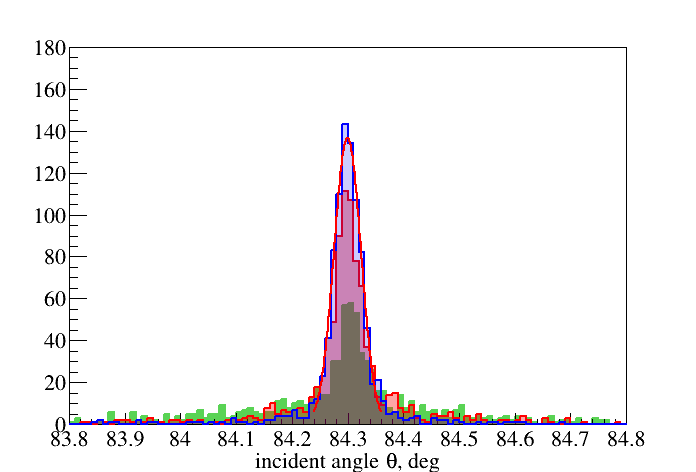

In [353]:
f = TF1("f", "gaus", 84.24, 84.36)
hangles3.Fit("f", "R")
can.Draw()

In [354]:
print(f.GetParameter(2)*2.336, f.GetParError(2)*2.336)

0.05615510961138378 0.0018389425601872717


In [355]:
print(f.GetChisquare(), f.GetNDF())

9.472310795778888 9


In [345]:
a = []
for i in range(100):
    a.append(hangles3.GetBinContent(i+1))
s = 0
for i in range(100):
    if hangles3.GetBinContent(i+1) > max(a)/2:
        s = s + hangles3.GetBinContent(i+1)
        print(i+1, hangles3.GetBinContent(i+1))
print(s)

48 83.0
49 110.0
50 143.0
51 134.0
52 107.0
53 82.0
659.0


In [633]:
file.Close()

In [1]:
from ROOT import *

Welcome to JupyROOT 6.26/00


In [2]:
file = TFile.Open("100GeV.root", "READ")
tree = []
for i in range(20):
    a = file.Get("Position"+str(i+1))
    tree.append(a)

hist = []
for i in range(20):
    h = TH1F("number of photons per run "+str(i+1), "", 1000, 0, 1000)
    hist.append(h)
FZX = []
FY = []

In [3]:
for i in range(len(tree)):
    AZX = []
    AY = []
    for entry in tree[i]:
        hist[i].Fill(entry.N)
        AZX.append(entry.fZX)
        AY.append(entry.fY)
    FZX.append(AZX)
    FY.append(AY)

In [4]:
FZXY = []
for i in range(20):
    S = 0 
    fzxy = []
    for j in range(1000):
        C = []
        for k in range(S, S + int(hist[i].GetBinContent(j+1))):
            S = S + 1
            C.append((FZX[i][k], FY[i][k]))
        fzxy.append(C)
    FZXY.append(fzxy)

In [5]:
FZXY_NEW = []
for i in range(20):
    FZXY_new = []
    for j in range(1000):
        FZXY_new.append(list(set(FZXY[i][j])))
    FZXY_NEW.append(FZXY_new)

In [6]:
Z2D = []
X2D = []

In [7]:
for i in range(20):
    if i%2 == 0:
        S = 0
        for j in range(1000):
            Z = 0.
            for k in range(len(FZXY_NEW[i][j])):
                Z = Z + (4*(floor(FZXY_NEW[i][j][k][0]/0.023)+1)-2)*0.00575*10000
                S = S + 1
            Z2D.append(Z/len(FZXY_NEW[i][j]))
    else:
        G = 0
        for m in range(1000):
            X = 0.
            for n in range(len(FZXY_NEW[i][m])):
                X = X + (4*(floor(FZXY_NEW[i][m][n][0]/0.023)+1)-2)*0.00575*10000
                G = G + 1
            X2D.append(X/len(FZXY_NEW[i][m]))

In [43]:
Y = []
delZ = 5
for i in range(10):
    Y.append(-39.4375+(i)*delZ)

In [9]:
layers = []
for i in range(1000):
    l = []
    for j in range(10):
        l.append(list([Z2D[j*1000+i], Y[j]]))
    layers.append(l)

In [76]:
I2

[0,
 1,
 5,
 6,
 9,
 10,
 16,
 17,
 18,
 24,
 35,
 36,
 38,
 39,
 41,
 42,
 43,
 44,
 47,
 48,
 52,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 81,
 82,
 83,
 84,
 85,
 86,
 89,
 90,
 91,
 93,
 94,
 95,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 108,
 109,
 110,
 111,
 112,
 114,
 115,
 117,
 120,
 121,
 125,
 126,
 127,
 130,
 132,
 133,
 135,
 136,
 137,
 139,
 140,
 141,
 142,
 143,
 146,
 148,
 150,
 151,
 152,
 153,
 156,
 157,
 158,
 159,
 164,
 165,
 167,
 168,
 169,
 172,
 175,
 176,
 177,
 179,
 180,
 181,
 182,
 183,
 187,
 188,
 189,
 191,
 200,
 201,
 203,
 204,
 205,
 206,
 207,
 208,
 217,
 220,
 221,
 223,
 224,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 238,
 240,
 241,
 242,
 244,
 245,
 246,
 251,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 269,
 270,
 271,
 272,
 274,
 275,
 276,
 277,
 283,
 284,
 285,
 287,
 289,
 291,
 292,
 293,
 294,
 295,
 297,
 298,
 300,
 301,
 302,
 303,


In [83]:
c = TCanvas()
gr = TGraph()
P = 775
for i in range(10):
    gr.SetPoint(i, layers[P][i][0]/1000, layers[P][i][1])
gr.Draw("AP")

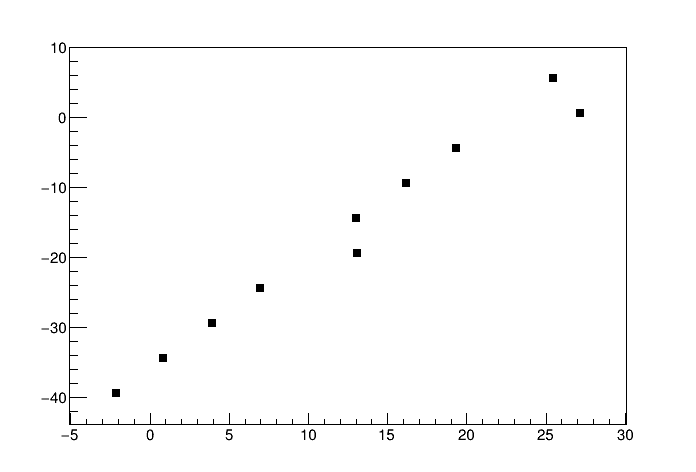

In [84]:
gr.SetMarkerStyle(21)
c.Draw()

In [85]:
c.SaveAs("TwoBad.C")

Info in <TCanvas::SaveSource>: C++ Macro file: TwoBad.C has been generated


In [33]:
Z_mean = []
for i in range(1000):
    zmean = 0
    for j in range(10):
        zmean = zmean + layers[i][j][0]
    Z_mean.append(zmean/10)
    
ymean = 0
for i in range(10):
    ymean = ymean + Y[i]
ymean = ymean/10

In [37]:
Z_mean = []
for i in range(1000):
    zmean = 0
    if i not in I1:
        for j in range(10):
            zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/10)
    else:
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/9)

In [38]:
Y_mean = []
for i in range(1000):
    ymean = 0
    if i not in I1:
        for j in range(10):
            ymean = ymean + Y[j]
        Y_mean.append(ymean/10)
    else:
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                ymean = ymean + Y[j]
        Y_mean.append(ymean/9)

In [44]:
Z_mean = []
for i in range(1000):
    zmean = 0
    if i not in I1:
        for j in range(10):
            zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/10)
    elif i in set(I1)-set(I2):
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/9)
    else:
        for j in range(10):
            if j != AA2[I2.index(i)][1].index(0) and j != AA2[I2.index(i)][1].index(max(AA2[I2.index(i)][1])):
                zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/8)

In [45]:
Y_mean = []
for i in range(1000):
    ymean = 0
    if i not in I1:
        for j in range(10):
            ymean = ymean + Y[j]
        Y_mean.append(ymean/10)
    elif i in set(I1)-set(I2):
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                ymean = ymean + Y[j]
        Y_mean.append(ymean/9)
    else:
        for j in range(10):
            if j != AA2[I2.index(i)][1].index(0) and j != AA2[I2.index(i)][1].index(max(AA2[I2.index(i)][1])):
                ymean = ymean + Y[j]
        Y_mean.append(ymean/8)

In [13]:
import math

In [34]:
angles = []
k = []
for i in range(1000):
    denom = 0
    numer = 0
    for j in range(10):
        numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - ymean)
        denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
    angles.append((180/math.pi)*math.atan(numer/denom))
    k.append(numer/denom)

In [46]:
angles3 = []
k2 = []
for i in range(1000):
    if i not in I1:
        denom = 0
        numer = 0
        for j in range(10):
            numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
            denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles3.append((180/math.pi)*math.atan(numer/denom))
    elif i in set(I1)-set(I2):
        denom = 0
        numer = 0
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
                denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles3.append((180/math.pi)*math.atan(numer/denom))
    else:
        denom = 0
        numer = 0
        for j in range(10):
            if j != AA2[I2.index(i)][1].index(0) and j != AA2[I2.index(i)][1].index(max(AA2[I2.index(i)][1])):
                numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
                denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles3.append((180/math.pi)*math.atan(numer/denom))
        k2.append(numer/denom)

In [39]:
angles2 = []
k1 = []
s = 0
for i in range(1000):
    if i not in I1:
        denom = 0
        numer = 0
        for j in range(10):
            numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
            denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles2.append((180/math.pi)*math.atan(numer/denom))
    else:
        denom = 0
        numer = 0
        for j in range(10):
            if j != AA1[s][1].index(max(AA1[s][1])):
                numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
                denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles2.append((180/math.pi)*math.atan(numer/denom))
        k1.append(numer/denom)
        s = s + 1

In [35]:
b = []
for i in range(1000):
    Y = 0 
    X = 0
    for j in range(10):
        Y = Y + layers[i][j][1]
        X = X + layers[i][j][0]
    b.append((Y-k[i]*X/1000)/10)

chi = []
for i in range(1000):
    c = 0
    for j in range(10):
        c = c + (layers[i][j][1] - k[i]*layers[i][j][0]/1000 - b[i])**2
    chi.append(c)

AA1 = []
I1 = []
for i in range(1000):
    if chi[i] > 0.1:
        A = []
        for j in range(10):
            c = (layers[i][j][1] - k[i]*layers[i][j][0]/1000 -b[i])**2
            A.append(c)
        AA1.append([i,A])
        I1.append(i)

In [40]:
b1 = []
ss = 0
for i in range(len(I1)):
    Y = 0 
    X = 0
    for j in range(10):
        if j != AA1[ss][1].index(max(AA1[ss][1])):
            Y = Y + layers[I1[i]][j][1]
            X = X + layers[I1[i]][j][0] #NOT i 
    b1.append((Y-k1[i]*X/1000)/9)
    ss = ss + 1

In [90]:
b2 = []
ss2 = 0
for i in range(len(I2)):
    Y = 0 
    X = 0
    for j in range(10):
        if j != AA2[ss2][1].index(max(AA2[ss2][1])) and j != AA2[ss2][1].index(0):
            Y = Y + layers[I2[i]][j][1]
            X = X + layers[I2[i]][j][0]
    b2.append((Y-k2[i]*X/1000)/8)
    ss2 = ss2 + 1

In [41]:
chi1 = []
sss = 0
for i in range(len(I1)):
    c = 0
    for j in range(10):
        if j != AA1[sss][1].index(max(AA1[sss][1])):
            c = c + (layers[I1[i]][j][1] - k1[i]*layers[I1[i]][j][0]/1000 - b1[i])**2
    chi1.append(c)
    sss = sss + 1

In [189]:
CHI1 = []
for i in range(len(AA1)):
    ab = 0
    for j in range(len(AA1[i][1])):
        ab = ab + AA1[i][1][j]
    CHI1.append(ab)

In [42]:
AA2 = []
I2 = []
for i in range(len(chi1)):
    if chi1[i] > 0.09:
        A = []
        for j in range(10):
            if j == AA1[i][1].index(max(AA1[i][1])):
                A.append(0)
            else:
                c = (layers[I1[i]][j][1] - k1[i]*layers[I1[i]][j][0]/1000 - b1[i])**2
                A.append(c)
        AA2.append([I1[i],A])
        I2.append(I1[i])

In [91]:
AA3 = []
I3 = []
for i in range(len(CHI2)):
    if CHI2[i] > 0.08:
        A = []
        for j in range(10):
            if j == AA2[i][1].index(max(AA2[i][1])):
                A.append(0)
            if AA2[i][1][j] == 0:
                A.append(0)
            else:
                c = (layers[I2[i]][j][1] - k2[i]*layers[I2[i]][j][0]/1000 - b2[i])**2
                A.append(c)
        AA3.append([I2[i],A])
        I3.append(I2[i])

In [92]:
CHI3 = []
for i in range(len(AA3)):
    ab = 0
    for j in range(len(AA3[i][1])):
        ab = ab + AA3[i][1][j]
    CHI3.append(ab)

In [86]:
CHI2 = []
for i in range(len(AA2)):
    ab = 0
    for j in range(len(AA2[i][1])):
        ab = ab + AA2[i][1][j]
    CHI2.append(ab)

In [87]:
canvas = TCanvas()
chiH = TH1F("chiH", "", 100, 0, 100)
chi1H = TH1F("chi1H", "", 100, 0, 100)
for i in range(len(chi)):
    chiH.Fill(chi[i])
    if i in I1:
        chi1H.Fill(chi1[I1.index(i)])
    else:
        chi1H.Fill(chi[i])

In [93]:
chi2H = TH1F("chi2H", "", 100, 0, 100)
for i in range(len(chi)):
    if i in I2:
        chi2H.Fill(CHI2[I2.index(i)])
    if i in set(I1)-set(I2):
        chi2H.Fill(chi1[I1.index(i)])
    else:
        chi2H.Fill(chi[i])

Warning in <TFile::Append>: Replacing existing TH1: chi2H (Potential memory leak).


In [94]:
chi3H = TH1F("chi3H", "", 100, 0, 100)
for i in range(len(chi)):
    if i in I3:
        chi3H.Fill(CHI3[I3.index(i)])
    if i in set(I2)-set(I3):
        chi3H.Fill(CHI2[I2.index(i)])
    if i in set(I1)-set(I2):
        chi3H.Fill(chi1[I1.index(i)])
    else:
        chi3H.Fill(chi[i])

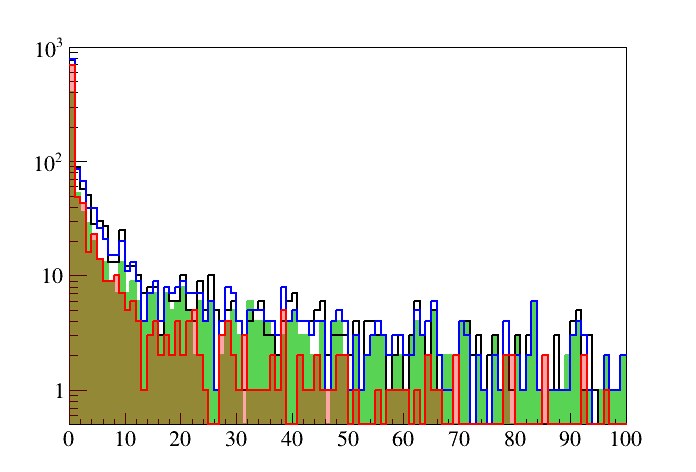

In [95]:
#chiH.GetXaxis().SetTitle("incident angle #theta, deg")
chiH.GetXaxis().CenterTitle(True)
chiH.GetXaxis().SetTitleFont(132)
chiH.GetXaxis().SetTitleSize(0.05)
chiH.GetXaxis().SetLabelFont(132)
chiH.GetYaxis().SetLabelFont(132)
chiH.GetXaxis().SetLabelSize(0.05)
chiH.GetYaxis().SetLabelSize(0.05)
chiH.SetLineWidth(2)
chiH.SetLineColor(8)
chiH.SetFillColor(8)
chiH.GetYaxis().SetRangeUser(0.5, 1000)
chiH.Draw()

chi3H.GetXaxis().CenterTitle(True)
chi3H.GetXaxis().SetTitleFont(132)
chi3H.GetXaxis().SetTitleSize(0.05)
chi3H.GetXaxis().SetLabelFont(132)
chi3H.GetYaxis().SetLabelFont(132)
chi3H.GetXaxis().SetLabelSize(0.05)
chi3H.GetYaxis().SetLabelSize(0.05)
chi3H.SetLineWidth(2)
chi3H.SetLineColor(kBlack)
chi3H.Draw("SAME")

chi2H.GetXaxis().CenterTitle(True)
chi2H.GetXaxis().SetTitleFont(132)
chi2H.GetXaxis().SetTitleSize(0.05)
chi2H.GetXaxis().SetLabelFont(132)
chi2H.GetYaxis().SetLabelFont(132)
chi2H.GetXaxis().SetLabelSize(0.05)
chi2H.GetYaxis().SetLabelSize(0.05)
chi2H.SetLineWidth(2)
chi2H.SetLineColor(kBlue)
chi2H.Draw("SAME")

chi1H.GetXaxis().CenterTitle(True)
chi1H.GetXaxis().SetTitleFont(132)
chi1H.GetXaxis().SetTitleSize(0.05)
chi1H.GetXaxis().SetLabelFont(132)
chi1H.GetYaxis().SetLabelFont(132)
chi1H.GetXaxis().SetLabelSize(0.05)
chi1H.GetYaxis().SetLabelSize(0.05)
chi1H.SetLineWidth(2)
chi1H.SetLineColor(kRed)
chi1H.SetFillColorAlpha(kRed, 0.35)
chi1H.Draw("SAME")
canvas.SetLogy()
canvas.Draw()